In [1]:

from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent
from langchain_openai import AzureChatOpenAI, AzureOpenAIEmbeddings
from dotenv import load_dotenv
from langchain_core.tools import tool
load_dotenv()
import os


azure_openai_endpoint = "https://par-mcdv1i6v-eastus2.cognitiveservices.azure.com/"
azure_openai_key = "B5c8gMOhCs1BGSMAMkGl6qYaHi2S6kfvaabhTFRq7SmVT5g1qTweJQQJ99BFACHYHv6XJ3w3AAAAACOGrH1e"
deployment_name = "gpt-4.1-nano"
llm = AzureChatOpenAI(azure_endpoint=azure_openai_endpoint, 
                      api_key=azure_openai_key, 
                      api_version="2024-12-01-preview",
                      azure_deployment=deployment_name
                      )

In [8]:
response = llm.invoke("""I wanto to build an application that leverages the Azure agentic power. The goal is to create an app that can optimize the azure 
           tenant usage, cost, resources, tracking, monitoring etc., it will be an azure tenant optimizer. Could you propose 5 interesting names that 
        I could use for this app.
               The first approach will be a POC.
           """)

In [9]:
print(response.content)

Certainly! Here are five interesting name ideas for your Azure tenant optimizer application:

1. **AzureOptima**  
   Conveying optimal resource management and efficiency within Azure.

2. **TenantTune**  
   Suggests fine-tuning and optimizing Azure tenant usage.

3. **AzuSage**  
   Implies wisdom and insights in managing Azure resources effectively.

4. **CloudSynergy**  
   Highlights harmonized management and optimization of cloud resources.

5. **OptiAzure**  
   Combines "Optimization" and "Azure" for a straightforward, impactful name.

These names are versatile and suitable for a POC, emphasizing the app's focus on optimization and monitoring. Would you like it to reflect specific features or themes?


In [3]:
@tool
def get_hr_context(category: str)-> str:
    "Get context based on category"

    context = ""
    if category.lower() == "payroll":
        context = """
1. Purpose
The purpose of this payroll policy is to outline the procedures and guidelines for compensating employees in a fair, consistent, and legally compliant manner. This policy ensures transparency and provides a clear understanding of how employees are paid.

2. Scope
This policy applies to all employees of Pedro's Company, including full-time, part-time, temporary, and contract employees.

3. Pay Schedule
Frequency: Employees are paid on a monthly basis.
Pay dates: Paychecks are issued on the 15th of every month.
4. Compensation Structure
Salaries and wages: Compensation is determined based on job role, experience, and performance. Salary ranges are reviewed periodically.
Pay increases: Performance-based raises and annual reviews determine salary increases.
Bonuses and commissions: Eligible employees may receive bonuses and commissions based on predefined criteria and performance metrics.
5. Overtime and Holiday Pay
Overtime: Overtime is defined as hours worked beyond 40 hours per week. Overtime is paid at 1.5 times the regular hourly rate.
Holiday pay: Employees who work on designated holidays will receive double time.
6. Deductions
Mandatory deductions: Federal and state taxes, Social Security, Medicare, and any court-ordered garnishments will be deducted from each paycheck.
Voluntary deductions: Employees may authorize deductions for retirement plans, health insurance premiums, and other benefits.
7. Timekeeping
Time tracking: Employees must accurately record their work hours using timesheets.
Submission and approval: Timesheets must be submitted by the end of the month, and supervisors must approve them by 30th each month.
8. Payroll Processing
Calculation: Payroll is calculated based on submitted and approved timesheets, including any applicable overtime and deductions.
Processing deadlines: All timekeeping records must be submitted by end of the month, and payroll will be processed by the 30th each month.
Error handling: Payroll errors must be reported to payroll department within the current month for correction.
9. Payment Methods
Direct deposit: Employees are encouraged to sign up for the company's direct deposit system. Forms for setting up direct deposit are available from [HR/payroll department].
Physical checks: Employees not using direct deposit will receive physical checks, distributed on paydays.
Payroll cards: [If applicable] Employees can opt to receive their pay on payroll cards.

10. Compliance
Regulatory compliance: All payroll practices comply with federal, state, and local labor laws.
Minimum wage and overtime: Pedro's Company adheres to all applicable minimum wage and overtime regulations.
12. Recordkeeping
Maintenance: Payroll records are maintained for a minimum of 5 years as required by law.
Access: Employees can request access to their payroll records by contacting payroll department.
13. Confidentiality
Confidential Information: Payroll information is confidential and will be accessed only by authorized personnel.
Access Control: Strict access controls are in place to protect payroll data.
15. Responsibilities
HR staff: Responsible for keeping accurate employee records including all information pertaining to payroll.
Payroll staff: Responsible for processing payroll accurately and on time.
Supervisors: Responsible for approving timesheets and leave requests.
Employees: Responsible for accurately recording and submitting work hours and making any changes known/updating payroll info."""

    elif category.lower() == "paternity leave":
        context = """Leave and Absence Policies
Paid leave: Vacation, sick leave, paternity leave and other paid leaves are deducted from accrued balances and paid according to regular pay rates.
Unpaid leave: Unpaid leave is recorded, and no pay is issued for the duration of the leave.
Leave requests: Leave requests must be submitted in advance and approved by supervisor.
Patternity leave is of 8 weeks. Employee can take less weeks, no more than 8."""

    elif category.lower() == "vacation time":
        context = """Pedro´s company offers flex time as a new benefit for employees. 
            Employee gets 5 vacations hours every 15 days.
            Empoyee has 5 days of vacation in march and another week in december.
            """
    elif category.lower() == "my benefits":
        context = """Employee Benefits are:
            
            - Parking lot in towers
            - Flex time
            - Home office
            - Gym membership
            - Paternity / Maternity Leave
            - Christmas bonus
            - Company shares
            - Company credit card
            """
    elif category.lower() == "holidays":
        context = """Holidays are:
            - February 5th
            - March 18th
            - March 21st
            - May 1st
            - May 10th half day
            - September 16th
            - November 2nd
            - November 20th
            - December 12th
            """
    return context


In [4]:
@tool
def get_it_context(category: str)-> str:
    "get context for answering questions related to IT topics"

    context = ""

    if category == "Authentication":

        context = """Here's a breakdown of authentication policy examples:
1. Password Policies:
Minimum password length and complexity: Enforcing rules for password strength, such as minimum length, requiring special characters, or prohibiting dictionary words.
Password expiration: Setting a time limit for password validity, requiring users to change their passwords periodically.
Password reuse prevention: Preventing users from reusing old passwords. 
2. Multi-Factor Authentication (MFA):
MFA for specific actions: Requiring MFA for sensitive operations like accessing financial data, changing personal information, or logging in from new locations. 
MFA for all logins: Implementing MFA for all user logins to enhance security. 
Different MFA methods: Utilizing various MFA methods like one-time passwords (OTP), biometrics (fingerprint, facial recognition), or security keys. 
3. Session Management:
Idle session timeout: Automatically logging users out after a period of inactivity.
Session expiration for mobile apps: Setting a time limit for mobile app sessions, especially on company-owned devices.
Token expiration: Setting expiration times for API tokens used for authentication. 
4. Authentication Policy Silos (Windows Server):
Protected Users Group:
A special security group that enforces stricter authentication rules. Users in this group may be required to use more robust authentication methods or may have their NTLM authentication disabled.
Authentication Policy Silos:
Allow administrators to group users and computers under specific authentication policies. 
5. Other Examples:
SSO (Single Sign-On): Allowing users to authenticate once to access multiple applications. 
Passwordless Authentication: Using methods like email links, magic links, or SSO solutions instead of passwords. 
Conditional Access Policies: Dynamically controlling access based on user, device, location, and other factors. 
Real-World Examples:
Snowflake:
Allows setting authentication policies to enforce MFA for password-based logins and SSO. 
Atlassian:
Offers various authentication policies including password requirements, two-step verification, and SSO enforcement. 
Microsoft Entra ID (formerly Azure AD):
Provides Conditional Access policies for controlling access based on authentication methods, device compliance, and other factors. 
Companies using Windows Server:
Employ Authentication Policies and Silos to manage authentication for different groups of users and computers. """

    elif category == "Hardware":

        context = """Hardware Procurement and Asset Management:
Policy:
Establish a clear process for acquiring new hardware, ensuring it meets specific technical requirements and aligns with the organization's IT strategy.
Example:
Specify the brands, models, and configurations of computers, laptops, and peripherals that are approved for purchase. Include procedures for requesting and justifying new hardware. Implement a system for tracking hardware assets (location, user, etc.). 
2. Acceptable Use Policy (AUP):
Policy:
Define what is considered acceptable use of company-owned hardware and software, including internet access, email, and social media.
Example:
Prohibit the installation of unauthorized software, downloading of illegal content, or use of company resources for personal gain. Outline consequences for policy violations. 
3. Security Policies:
Policy:
Implement measures to protect hardware and data from unauthorized access, loss, or damage.
Example:
Require strong passwords, regular software updates, and the use of antivirus and anti-malware software on all devices. Encrypt sensitive data stored on laptops and mobile devices. Establish procedures for reporting lost or stolen devices. 
4. Remote Access Policy:
Policy:
Govern how employees access company systems and data when working remotely.
Example:
Specify the use of VPNs, secure connections, and multi-factor authentication for remote access. Ensure devices used for remote access meet security requirements. 
5. BYOD (Bring Your Own Device) Policy:
Policy: Address the use of personal devices for accessing company resources.
Example: Outline the steps employees must take to connect personal devices to the company network, including security requirements and acceptable use guidelines. 
6. Data Security Policy:
Policy:
Define protocols for protecting data, including encryption, access controls, and data breach response plans.
Example:
Specify how data should be encrypted when stored or transmitted. Limit access to sensitive data based on job roles. Have a documented plan for responding to data breaches. 
7. Software and Hardware Management:
Policy:
Establish procedures for software and hardware installation, updates, and disposal of old equipment. 
Example:
Ensure that all software is licensed and kept up to date with security patches. Outline procedures for securely disposing of old hardware, including wiping data and recycling components. 
By implementing these hardware policies, organizations can create a more secure, efficient, and compliant IT environment. These policies help protect valuable assets, prevent data breaches, and ensure that employees are using company resources responsibly. """

    return context

In [ ]:
hr_agent = create_react_agent(
    model = llm,
    name = "hr_agent",
    tools = [get_hr_context],
    prompt = "You're a smart assistant that help users to answer questions realted to Human Resources Topics" \
    "Your job is to always use your tool to generate an answer based on provided category" \
    "Do not try to generate the answer by yourself, always call your tool: get_hr_context and provide the most complete answer that you can." \
    "Do not return responses like: I'm retrieving information..." \
    "Always retrieve the info from your tools and generate an accurate response"
    
)

it_agent = create_react_agent(
    model = llm,
    name = "it_agent",
    tools = [get_it_context],
    prompt = "You're a smart assistant that help users to answer questions realted to IT Topics" \
    "Your job is to always use your tool to generate an answer based on provided category" \
    "Do not try to generate the answer by yourself, always call your tool: get_it_context and provided the most complete answer that you can." \
    "Do not return responses like: I'm retrieving information..." \
    "Always retrieve the info from your tools and generate an accurate response"
    
)

In [21]:
workflow = create_supervisor(
    agents=[hr_agent, it_agent],
    model=llm,
    prompt = "You're a smart assistant that act as a supervisor and handles two agents: it_agent and hr_agent." \
    "Your job is to analyze the query from user and handoff to the most suitable agent" \
    "Here is the list of sub-agents: it_agent, hr_agent"
    "The hr_agent answer questions related to human resources topics." \
    "The it_agent answer questions related to IT department topics" \
    "For IT topics always handoff to it_agent" \
    "For Human resources (HR) topics (questions), always handoff to the hr_agent" \
    "Before returning your final response, check the input from user and the answer from sub agent and construct a full response." \
    "Return the most complete answer that you can construct"
     
)


app = workflow.compile(name="supervisor_agent")

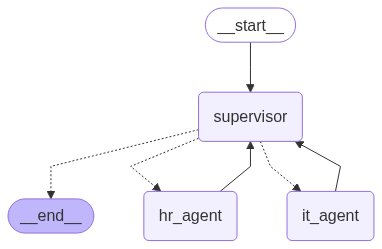

In [25]:
app

In [24]:
query = "How many paternity weeks do I have as a dad? "
sample_input = {"messages":[{"role":"user", "content": query}]}

response = app.invoke(sample_input)
print(response['messages'][-1].content)

You are eligible for up to 8 weeks of paternity leave. You can choose to take less than the full 8 weeks if you wish. If you need more specific information or assistance regarding your paternity leave, please let me know.


In [23]:
response['messages']

[HumanMessage(content='How many paternity weeks do I have as a dad? ', additional_kwargs={}, response_metadata={}, id='cbde3a89-2abf-49ff-8be6-51456200997a'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cw9zaYqBmTWi97SatEbxR3Y1', 'function': {'arguments': '{}', 'name': 'transfer_to_hr_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 203, 'total_tokens': 216, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_68472df8fd', 'id': 'chatcmpl-Bph8UF9VubGt14LxFh5yOD7e1lXN2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sex

In [14]:
for c in app.stream(sample_input):
    print(c)

{'supervisor': {'messages': [HumanMessage(content='How many paternity weeks do I have as a dad? ', additional_kwargs={}, response_metadata={}, id='d2ab9f8b-64ca-46fa-bad1-1191391fb113'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_3luGYCJCiZw1tNtwZo1HOHhT', 'function': {'arguments': '{}', 'name': 'transfer_to_hr_agent'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 183, 'total_tokens': 196, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_68472df8fd', 'id': 'chatcmpl-Bph3FbGyk77yc0H7zx2d0b1gnJXi9', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm': {'filtered': False